In [1]:
import os
import json
from csv import writer
directory="C:/Users/Admin/Desktop/Study/Topics in IS/Project/Data/semeval2017-task8-dataset/rumoureval-data"
os.chdir(directory)
print(os.getcwd())

C:\Users\Admin\Desktop\Study\Topics in IS\Project\Data\semeval2017-task8-dataset\rumoureval-data


In [2]:
DataDir=dict()
d='.'
#tweetDir=[x[0] for x in os.walk(d)] #gets all directories, sub directories and files
eventDir=[os.path.join(d,o) for o in os.listdir(d) if os.path.isdir(os.path.join(d,o))]
print(eventDir)

['.\\charliehebdo', '.\\ebola-essien', '.\\ferguson', '.\\germanwings-crash', '.\\ottawashooting', '.\\prince-toronto', '.\\putinmissing', '.\\sydneysiege']


In [3]:
for x in range(len(eventDir)):
    eventDir[x]=eventDir[x][2:]

In [4]:
for event in eventDir:
    newDir=directory+"/"+event
    #print(newDir)
    os.chdir(newDir)
    print(os.getcwd())
    tweetDir=[os.path.join(d,o) for o in os.listdir(d) if os.path.isdir(os.path.join(d,o))]
    for x in range(len(tweetDir)):
        tweetDir[x]=tweetDir[x][2:]
    DataDir[event]=tweetDir

C:\Users\Admin\Desktop\Study\Topics in IS\Project\Data\semeval2017-task8-dataset\rumoureval-data\charliehebdo
C:\Users\Admin\Desktop\Study\Topics in IS\Project\Data\semeval2017-task8-dataset\rumoureval-data\ebola-essien
C:\Users\Admin\Desktop\Study\Topics in IS\Project\Data\semeval2017-task8-dataset\rumoureval-data\ferguson
C:\Users\Admin\Desktop\Study\Topics in IS\Project\Data\semeval2017-task8-dataset\rumoureval-data\germanwings-crash
C:\Users\Admin\Desktop\Study\Topics in IS\Project\Data\semeval2017-task8-dataset\rumoureval-data\ottawashooting
C:\Users\Admin\Desktop\Study\Topics in IS\Project\Data\semeval2017-task8-dataset\rumoureval-data\prince-toronto
C:\Users\Admin\Desktop\Study\Topics in IS\Project\Data\semeval2017-task8-dataset\rumoureval-data\putinmissing
C:\Users\Admin\Desktop\Study\Topics in IS\Project\Data\semeval2017-task8-dataset\rumoureval-data\sydneysiege


In [5]:
tweets=list()
for key in DataDir:
    for x in range(len(DataDir[key])):
        newDir=directory+"/"+key+"/"+DataDir[key][x]+"/"+"source-tweet"
        os.chdir(newDir)
        fileName=DataDir[key][x]+".json"
        with open(fileName) as data_file:    
            line = data_file.readline() # read only the first tweet/line
            tweet = json.loads(line) # load it as Python dict
            #print(json.dumps(tweet, indent=4)) # pretty-print
        tweets.append(tweet)
        #print(data)
        #print(os.getcwd())
print(len(tweets))

297


In [6]:
tweets[1]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sun Oct 12 18:03:21 +0000 2014',
 'entities': {'hashtags': [],
  'media': [{'display_url': 'pic.twitter.com/r6y8d9HMAw',
    'expanded_url': 'http://twitter.com/TransferRelated/status/521359454672269313/photo/1',
    'id': 521359453786882049,
    'id_str': '521359453786882049',
    'indices': [103, 125],
    'media_url': 'http://pbs.twimg.com/media/Bzw9qTNCQAE0a0c.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/Bzw9qTNCQAE0a0c.jpg',
    'sizes': {'large': {'h': 330, 'resize': 'fit', 'w': 600},
     'medium': {'h': 330, 'resize': 'fit', 'w': 600},
     'small': {'h': 187, 'resize': 'fit', 'w': 340},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'source_status_id': 521359454672269313,
    'source_status_id_str': '521359454672269313',
    'type': 'photo',
    'url': 'http://t.co/r6y8d9HMAw'}],
  'symbols': [],
  'urls': [],
  'user_mentions': []},
 'extended_entities': {'media': [{'display_url': 'pic.twitt

In [7]:
labelDir="C:/Users/Admin/Desktop/Study/Topics in IS/Project/Data/semeval2017-task8-dataset/traindev"
os.chdir(labelDir)
with open("rumoureval-subtaskB-train.json") as data_file:    
    line = data_file.readline() # read only the first tweet/line
    label = json.loads(line)

with open("rumoureval-subtaskB-dev.json") as data_file:    
    line = data_file.readline() # read only the first tweet/line
    testlabel = json.loads(line)

print(len(label))
len(testlabel)

272


25

In [8]:
dataFrame = {'tweet_id':[], 'tweet_time':[], 'text': [], 'retweet_count':[], 'favorite_count':[],
             'hashtags':[], 'hashtag_indices':[], 'user_mentions':[], 'user_mention_indices':[], 'screen_name': [], 'url':[], 
             'created_at': [], 'user_favorite_count': [], 'friends_count': [], 'followers_count': [],'statuses_count':[], 'label':[]}

testdataFrame = {'tweet_id':[], 'tweet_time':[], 'text': [], 'retweet_count':[], 'favorite_count':[],
             'hashtags':[], 'hashtag_indices':[], 'user_mentions':[], 'user_mention_indices':[], 'screen_name': [], 'url':[],
             'created_at': [], 'user_favorite_count': [], 'friends_count': [], 'followers_count': [],'statuses_count':[], 'label':[]}


In [9]:
for t in tweets:
    if t['id_str'] in label.keys():
        dataFrame['label'].append(label[t['id_str']])
        hashtags=[]
        hashtagIndices=[]
        userMention=[]
        userMentionIndices=[]
        url=[]
        dataFrame['tweet_id'].append(t['id'])
        dataFrame['tweet_time'].append(t['created_at'])
        dataFrame['text'].append(t['text'])
        dataFrame['retweet_count'].append(t['retweet_count'])
        dataFrame['favorite_count'].append(t['favorite_count'])
        for item in t['entities']['hashtags']:
            hashtags.append(item['text'])
            hashtagIndices.append(item['indices'][0])
        dataFrame['hashtags'].append(hashtags)
        dataFrame['hashtag_indices'].append(hashtagIndices)
        for item in t['entities']['user_mentions']:
            userMention.append(item['name'])
            userMentionIndices.append(item['indices'][0])
        dataFrame['user_mentions'].append(userMention)
        for item in t['entities']['urls']:
            url.append(item['url'])
        dataFrame['url'].append(url)
        dataFrame['user_mention_indices'].append(userMentionIndices)
        dataFrame['screen_name'].append(t['user']['screen_name'])
        dataFrame['created_at'].append(t['user']['created_at'])
        dataFrame['user_favorite_count'].append(t['user']['favourites_count'])
        dataFrame['friends_count'].append(t['user']['friends_count'])
        dataFrame['followers_count'].append(t['user']['followers_count'])
        dataFrame['statuses_count'].append(t['user']['statuses_count'])
    else:
        testdataFrame['label'].append(testlabel[t['id_str']])
        hashtags=[]
        hashtagIndices=[]
        userMention=[]
        userMentionIndices=[]
        url=[]
        testdataFrame['tweet_id'].append(t['id'])
        testdataFrame['tweet_time'].append(t['created_at'])
        testdataFrame['text'].append(t['text'])
        testdataFrame['retweet_count'].append(t['retweet_count'])
        testdataFrame['favorite_count'].append(t['favorite_count'])
        for item in t['entities']['hashtags']:
            hashtags.append(item['text'])
            hashtagIndices.append(item['indices'][0])
        testdataFrame['hashtags'].append(hashtags)
        testdataFrame['hashtag_indices'].append(hashtagIndices)
        for item in t['entities']['user_mentions']:
            userMention.append(item['name'])
            userMentionIndices.append(item['indices'][0])
        testdataFrame['user_mentions'].append(userMention)
        for item in t['entities']['urls']:
            url.append(item['url'])
        testdataFrame['url'].append(url)
        testdataFrame['user_mention_indices'].append(userMentionIndices)
        testdataFrame['screen_name'].append(t['user']['screen_name'])
        testdataFrame['created_at'].append(t['user']['created_at'])
        testdataFrame['user_favorite_count'].append(t['user']['favourites_count'])
        testdataFrame['friends_count'].append(t['user']['friends_count'])
        testdataFrame['followers_count'].append(t['user']['followers_count'])
        testdataFrame['statuses_count'].append(t['user']['statuses_count'])


In [10]:
import pandas as pd
df = pd.DataFrame(dataFrame)
dfTest=pd.DataFrame(testdataFrame)

In [11]:
df['tweet_time'] = pd.to_datetime(df['tweet_time'])
df['created_at'] = pd.to_datetime(df['created_at'])
dfTest['tweet_time'] = pd.to_datetime(dfTest['tweet_time'])
dfTest['created_at'] = pd.to_datetime(dfTest['created_at'])

In [12]:
df

,created_at,favorite_count,followers_count,friends_count,hashtag_indices,hashtags,label,retweet_count,screen_name,statuses_count,text,tweet_id,tweet_time,url,user_favorite_count,user_mention_indices,user_mentions
0,2012-05-14 04:46:32,85,7416,15,[],[],false,575,FootballcomEN,10431,Unconfirmed reports claim that Michael Essien ...,521346721226711040,2014-10-12 17:08:39,[],1,[],[]
1,2013-07-15 03:32:28,328,115868,153,[],[],false,781,FutbolLife,728,AC Milan midfielder Michael Essien has been di...,521360486387175424,2014-10-12 18:03:21,[],6,[],[]
2,2009-03-13 12:55:21,46,133561,127,[88],[Ferguson],unverified,146,MichaelSkolnik,28255,Mike Brown was staying with his grandmother fo...,498280126254428160,2014-08-10 01:30:14,[],19845,[],[]
3,2009-03-13 12:55:21,53,133554,127,[87],[Ferguson],true,288,MichaelSkolnik,28252,Witness: Police allegedly stopped Mike Brown a...,498430783699554305,2014-08-10 11:28:53,[],19846,[],[]
4,2010-12-25 21:38:19,37,201086,290,[69],[Ferguson],unverified,155,AnonymousPress,14510,Line of police cars with high beams on greets ...,499366666300846081,2014-08-13 01:27:45,[],718,[],[]
5,2008-10-30 19:24:15,93,11052,12141,"[14, 70]","[FoxNews, Ferguson]",unverified,112,clydetheslyde,15401,"Currently the #FoxNews website has zero, repea...",499368931367608320,2014-08-13 01:36:45,[],5172,[],[]
6,2008-10-23 22:13:50,23,2422,626,[135],[ferguson],unverified,185,valeriehahn,2368,St. Louis Co Police tell me ofcr shot a man wh...,499456140044824576,2014-08-13 07:23:17,[],197,[],[]
7,2009-03-13 12:55:21,73,133403,125,[11],[Ferguson],unverified,435,MichaelSkolnik,28215,A woman in #Ferguson was shot in head last nig...,499530130487017472,2014-08-13 12:17:18,[],19825,[],[]
8,2010-09-26 07:34:31,41,50984,6075,"[124, 130]","[tcot, ferguson]",unverified,120,larryelder,12552,Nearly 7k blacks were murdered last yr--almost...,499612545909415938,2014-08-13 17:44:47,[],11,[],[]
9,2008-08-06 19:55:31,38,1208620,734,[8],[Ferguson],unverified,100,USATODAY,95434,Name of #Ferguson cop is expected to be releas...,500258409988763649,2014-08-15 12:31:13,[http://t.co/NhMsTgfzYi],709,[],[]


In [16]:
import re
uncleanData=list()
uncleanDataTest=list()
for index, row in df.iterrows():
    text=re.sub(' http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', "", row["text"])
    uncleanData.append((text,row["label"]))
    
for index, row in dfTest.iterrows():
    text=re.sub(' http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', "", row["text"])
    uncleanDataTest.append((text,row["label"]))

In [17]:
uncleanData

[('Unconfirmed reports claim that Michael Essien has contracted Ebola.',
  'false'),
 ('AC Milan midfielder Michael Essien has been diagnosed with Ebola. Get well soon Michael. [Daily Times]',
  'false'),
 ('Mike Brown was staying with his grandmother for the summer, who lived in the community. #Ferguson',
  'unverified'),
 ('Witness: Police allegedly stopped Mike Brown after yelling at him to walk on sidewalk. #Ferguson',
  'true'),
 ("Line of police cars with high beams on greets anyone trying to enter #Ferguson. It's shut down. No media allowed.",
  'unverified'),
 ('Currently the #FoxNews website has zero, repeat, ZERO coverage of the #Ferguson protests, probably due to lack of cowboy hats.',
  'unverified'),
 ('St. Louis Co Police tell me ofcr shot a man who pointed handgun at him at Chambers &amp; Sheffingdell at about 1 a.m. Man in critical. #ferguson',
  'unverified'),
 ('A woman in #Ferguson was shot in head last night and released this selfie. Conflicting reports of how it ha

In [15]:
#Sampling to check if dataset is skewed or not
import numpy as np
trueData = list()
for data in uncleanData:
    if data[1]=='true':
        trueData.append(data[0])

unsampledTrainData = np.asarray(trueData)
sampledTrainData = np.random.choice(unsampledTrainData,50)


realData=list()
for data in sampledTrainData.tolist():
    realData.append((data,'true'))
    
fakeData=list()
for data in uncleanData:
    if data[1]=='false':
        fakeData.append(data[0])

        
uncleanData=realData+fakeData
len(uncleanData)

100

In [16]:
uncleanDataTest

[('Germanwings Airbus A320 crashes in French Alps near Digne', 'true'),
 ('BREAKING: 148 passengers were on board #GermanWings Airbus A320 which has crashed in the southern French Alps',
  'false'),
 ('Accident aircraft looks to be Germanwings (Airline code 4U or GWI) flight 9525, Barcelona to Dusseldorf. #4U9525',
  'true'),
 ('Now hearing 148 passengers + crew on board the #A320 that has crashed in southern French Alps. #GermanWings flight. @BBCWorld',
  'false'),
 ('German Wings airline tweeting now about reports of plane crashing in French Alps with 148 on board: @germanwings',
  'false'),
 ('Germanwings passenger plane crashes in France:', 'true'),
 ('JUST IN: Germanwings plane crashes in southern France, up to 150 feared dead',
  'true'),
 ('Flight #4U9525 initially climbed to 38,000 feet before before it started to descend and lost signal at 6,800 feet.',
  'true'),
 ('Heart goes out to 148 passengers and crew of Germanwings Airbus A320 that has crashed in French Alps, Southern 

In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

In [19]:
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)
tokenizedData=[tknzr.tokenize(item[0]) for item in uncleanData]
tokenizedDataTest=[tknzr.tokenize(item[0]) for item in uncleanDataTest]

tokenizedData[0]

['Unconfirmed',
 'reports',
 'claim',
 'that',
 'Michael',
 'Essien',
 'has',
 'contracted',
 'Ebola',
 '.']

In [20]:
unigramsUnclean=list()
for data in tokenizedData:
    for token in data:
        unigramsUnclean.append(token.lower())

uniqueUnigrams = list(set(unigramsUnclean))
len(uniqueUnigrams)

1280

In [23]:
unigramCount = dict()
lowFreqWords = list()
for item in unigramsUnclean:
    if item not in unigramCount.keys():
        unigramCount[item] = 1
    else:
        unigramCount[item] +=1
unigramCount

{'inquiries': 1,
 'look': 1,
 "tonight's": 1,
 'mother': 1,
 '9': 1,
 'counter': 1,
 'dies': 1,
 'picture': 2,
 'buildings': 1,
 'newspaper': 3,
 'brown': 8,
 'russian': 2,
 'lindt': 6,
 'cartoon': 1,
 'soon': 1,
 'http://t.co/yxxlhehst9': 1,
 'believe': 2,
 'a': 71,
 'footage': 2,
 'stable': 1,
 'darren': 3,
 'central': 1,
 'comes': 1,
 'omg': 1,
 "we've": 1,
 'incidents': 2,
 'industrial': 1,
 'north-east': 1,
 'these': 2,
 'earlier': 2,
 'rocket-propelled': 1,
 'know': 2,
 'despite': 1,
 '9news': 1,
 'original': 1,
 'co': 1,
 'work': 1,
 'cp24': 1,
 'promoter': 1,
 'walked': 1,
 'compelling': 1,
 'smokin': 1,
 'thought': 1,
 'cop': 6,
 'thoughts': 2,
 'in': 151,
 'relaxed': 1,
 'punching': 1,
 'any': 1,
 'haron': 1,
 'toronto': 8,
 'closet': 1,
 'grenade': 1,
 'itself': 1,
 '47': 1,
 'ctv': 2,
 'clarification': 1,
 'pressed': 1,
 '#rcmp': 1,
 'assassinate': 1,
 'account': 1,
 'press': 3,
 'say': 8,
 'now': 9,
 'stopped': 2,
 'attackers': 4,
 'deployed': 1,
 'women': 1,
 'paramedic':

In [24]:
for key in unigramCount.keys():
    if unigramCount[key]<2:
        lowFreqWords.append(key)
lowFreqWords

['inquiries',
 'look',
 "tonight's",
 'mother',
 '9',
 'counter',
 'dies',
 'buildings',
 'cartoon',
 'soon',
 'http://t.co/yxxlhehst9',
 'stable',
 'central',
 'comes',
 'omg',
 "we've",
 'industrial',
 'north-east',
 'rocket-propelled',
 'despite',
 '9news',
 'original',
 'co',
 'work',
 'cp24',
 'promoter',
 'walked',
 'compelling',
 'smokin',
 'thought',
 'relaxed',
 'punching',
 'any',
 'haron',
 'closet',
 'grenade',
 'itself',
 '47',
 'clarification',
 'pressed',
 '#rcmp',
 'assassinate',
 'account',
 'deployed',
 'women',
 'paramedic',
 'jesse',
 'wave',
 'property',
 'ak',
 'honour',
 'suffering',
 'six-year-old',
 '#shooting',
 'iranian',
 '#nhl',
 'among',
 'somehow',
 '#prayforsydney',
 'mast',
 '#hamont',
 'absence',
 'manager',
 "morning's",
 'negotiating',
 'literally',
 'map',
 'milan',
 'wristbands',
 'country',
 'gunshot',
 'crime',
 'airspace',
 'devices',
 '#canada',
 '6pm',
 'patients',
 'worst',
 'hands',
 'hostage-takers',
 'rates',
 'escaping',
 'does',
 'pick',

In [25]:
stop = list(set(stopwords.words('english')))
uselessWords = stop + lowFreqWords
noStopUnigrams = [item for item in uniqueUnigrams if item not in uselessWords]
len(noStopUnigrams)

439

In [27]:
import random

In [28]:
trainSet=[i for i in range(len(uncleanData))]
trainingData = pd.DataFrame(index=trainSet,columns=noStopUnigrams)

In [29]:
for x in range(len(uncleanData)):
    for item in noStopUnigrams:
        if item in uncleanData[x][0]:
            trainingData.loc[x,item]=1
        else:
            trainingData.loc[x,item]=0

In [30]:
trainingData

,picture,newspaper,brown,press,russian,lindt,surprise,believe,war,footage,...,wanted,“,latest,news,today,report,national,secret,involving,shooter
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
trainingLabels=pd.DataFrame(index=trainSet,columns=["Label"])
for x in range(len(uncleanData)):
    trainingLabels.loc[x,"Label"]=uncleanData[x][1]

In [32]:
testSet=[i for i in range(len(uncleanDataTest))]
testingData = pd.DataFrame(index=testSet,columns=noStopUnigrams)

In [33]:
for x in range(len(uncleanDataTest)):
    for item in noStopUnigrams:
        if item in uncleanDataTest[x][0]:
            testingData.loc[x,item]=1
        else:
            testingData.loc[x,item]=0

In [34]:
testingData

,picture,newspaper,brown,press,russian,lindt,surprise,believe,war,footage,...,wanted,“,latest,news,today,report,national,secret,involving,shooter
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [35]:
testingLabels=pd.DataFrame(index=testSet,columns=["Label"])
for x in range(len(uncleanDataTest)):
    testingLabels.loc[x,"Label"]=uncleanDataTest[x][1]

In [36]:
from sklearn import metrics
from sklearn import tree

In [130]:
def calPrecision(a,b):
    i=0
    count = 0
    hit=0
    for label in a:
        if label == 'false':
            count+=1
            if b['Label'][i] == 'false':
                hit+=1
        i+=1
    return hit/count

In [131]:
def calRecall(a,b):
    i=0
    count = 0
    hit= 0
    for label in a:
        if b['Label'][i] == 'false':
            count+=1
            if label == 'false':
                hit+=1
        i+=1
    return hit/count

In [132]:
def fmeasure(p,r):
    return (2*p*r)/(p+r)

In [128]:
classifier4 = tree.DecisionTreeClassifier()
classifier4 = classifier4.fit(trainingData, trainingLabels.values.ravel())
output2=classifier4.predict(testingData)
print(metrics.accuracy_score(testingLabels, output2))

0.44


In [133]:
p=calPrecision(output2,testingLabels)
p

0.5

In [134]:
r=calRecall(output2,testingLabels)
r

0.08333333333333333

In [135]:
fmeasure(p,r)

0.14285714285714285

In [136]:
i=0
for item in output2:
    print(str(i) + " "+ item + " "+testingLabels['Label'][i])
    i=i+1

0 unverified true
1 unverified false
2 unverified unverified
3 false false
4 true false
5 true true
6 true true
7 unverified unverified
8 unverified false
9 true false
10 true true
11 unverified false
12 false true
13 true false
14 true false
15 true false
16 true true
17 unverified false
18 true true
19 unverified true
20 true true
21 true true
22 unverified false
23 unverified unverified
24 unverified false


In [137]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [139]:
classifier=MultinomialNB(alpha=1.0)
classifier.fit(trainingData, trainingLabels.values.ravel())
output=classifier.predict(testingData)
print (metrics.accuracy_score(testingLabels, output))

0.4


In [140]:
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(trainingData, trainingLabels.values.ravel())
output3=clf.predict(testingData)
print(metrics.accuracy_score(testingLabels, output3))

0.4


In [141]:
output

array(['unverified', 'true', 'unverified', 'true', 'true', 'true', 'true',
       'true', 'unverified', 'true', 'false', 'true', 'true', 'true',
       'true', 'true', 'true', 'unverified', 'true', 'true', 'true',
       'true', 'unverified', 'unverified', 'unverified'], 
      dtype='<U10')

In [142]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(trainingData, trainingLabels.values.ravel())
output4=clf.predict(testingData)
print(metrics.accuracy_score(testingLabels, output4))

0.44


In [143]:
df

,created_at,favorite_count,followers_count,friends_count,hashtag_indices,hashtags,label,retweet_count,screen_name,statuses_count,text,tweet_id,tweet_time,url,user_favorite_count,user_mention_indices,user_mentions
0,2012-05-14 04:46:32,85,7416,15,[],[],false,575,FootballcomEN,10431,Unconfirmed reports claim that Michael Essien ...,521346721226711040,2014-10-12 17:08:39,[],1,[],[]
1,2013-07-15 03:32:28,328,115868,153,[],[],false,781,FutbolLife,728,AC Milan midfielder Michael Essien has been di...,521360486387175424,2014-10-12 18:03:21,[],6,[],[]
2,2009-03-13 12:55:21,46,133561,127,[88],[Ferguson],unverified,146,MichaelSkolnik,28255,Mike Brown was staying with his grandmother fo...,498280126254428160,2014-08-10 01:30:14,[],19845,[],[]
3,2009-03-13 12:55:21,53,133554,127,[87],[Ferguson],true,288,MichaelSkolnik,28252,Witness: Police allegedly stopped Mike Brown a...,498430783699554305,2014-08-10 11:28:53,[],19846,[],[]
4,2010-12-25 21:38:19,37,201086,290,[69],[Ferguson],unverified,155,AnonymousPress,14510,Line of police cars with high beams on greets ...,499366666300846081,2014-08-13 01:27:45,[],718,[],[]
5,2008-10-30 19:24:15,93,11052,12141,"[14, 70]","[FoxNews, Ferguson]",unverified,112,clydetheslyde,15401,"Currently the #FoxNews website has zero, repea...",499368931367608320,2014-08-13 01:36:45,[],5172,[],[]
6,2008-10-23 22:13:50,23,2422,626,[135],[ferguson],unverified,185,valeriehahn,2368,St. Louis Co Police tell me ofcr shot a man wh...,499456140044824576,2014-08-13 07:23:17,[],197,[],[]
7,2009-03-13 12:55:21,73,133403,125,[11],[Ferguson],unverified,435,MichaelSkolnik,28215,A woman in #Ferguson was shot in head last nig...,499530130487017472,2014-08-13 12:17:18,[],19825,[],[]
8,2010-09-26 07:34:31,41,50984,6075,"[124, 130]","[tcot, ferguson]",unverified,120,larryelder,12552,Nearly 7k blacks were murdered last yr--almost...,499612545909415938,2014-08-13 17:44:47,[],11,[],[]
9,2008-08-06 19:55:31,38,1208620,734,[8],[Ferguson],unverified,100,USATODAY,95434,Name of #Ferguson cop is expected to be releas...,500258409988763649,2014-08-15 12:31:13,[http://t.co/NhMsTgfzYi],709,[],[]


In [265]:
#USER RELATED FEATURES
userData = list()
for index, row in df.iterrows():
    #text=re.sub(' http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', "", row["text"])
    userData.append(((row["tweet_time"]-row["created_at"]).total_seconds()/3600,row["favorite_count"],row["followers_count"],row["friends_count"],row["statuses_count"],row["label"]))
userData

[(21156.368611111113, 85, 7416, 15, 10431, 'false'),
 (10910.514722222222, 328, 115868, 153, 728, 'false'),
 (47412.58138888889, 46, 133561, 127, 28255, 'unverified'),
 (47422.55888888889, 53, 133554, 127, 28252, 'true'),
 (31827.823888888888, 37, 201086, 290, 14510, 'unverified'),
 (50694.208333333336, 93, 11052, 12141, 15401, 'unverified'),
 (50865.1575, 23, 2422, 626, 2368, 'unverified'),
 (47495.36583333334, 73, 133403, 125, 28215, 'unverified'),
 (34018.171111111114, 41, 50984, 6075, 12552, 'unverified'),
 (52792.595, 38, 1208620, 734, 95434, 'unverified'),
 (54093.43388888889, 48, 53516, 316, 52141, 'unverified'),
 (43927.60833333333, 50, 722151, 413, 90929, 'unverified'),
 (44063.59777777778, 114, 11082, 10092, 33545, 'unverified'),
 (34171.491944444446, 58, 58301, 4177, 55026, 'unverified'),
 (41647.358611111114, 10, 19134, 1721, 11942, 'unverified'),
 (44606.06611111111, 35, 2694, 688, 5051, 'unverified'),
 (35441.407222222224, 38, 13953, 2025, 168438, 'unverified'),
 (79.3305

In [266]:
userDataTest = list()
for index, row in dfTest.iterrows():
    #text=re.sub(' http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', "", row["text"])
    userDataTest.append(((row["tweet_time"]-row["created_at"]).total_seconds()/3600,row["favorite_count"],row["followers_count"],row["friends_count"],row["statuses_count"],row["label"]))
userDataTest

[(69428.01861111113, 684, 14134290, 3, 23811, 'true'),
 (53162.21055555555, 5, 502598, 30, 109571, 'false'),
 (50306.946388888886, 10, 44760, 2245, 32865, 'unverified'),
 (48397.7375, 17, 7846, 723, 1447, 'false'),
 (54650.91027777778, 17, 756575, 361, 54532, 'false'),
 (67143.05333333334, 10, 2742831, 8137, 58973, 'true'),
 (51529.81138888889, 17, 327148, 149, 157893, 'true'),
 (43240.67138888889, 202, 214148, 369, 7991, 'unverified'),
 (47787.64472222222, 94, 145903, 86003, 5339, 'false'),
 (68988.34416666668, 14, 7038, 347, 59569, 'false'),
 (25465.59388888889, 15, 21139, 21934, 6833, 'true'),
 (69428.99111111111, 523, 14132292, 3, 23812, 'false'),
 (39449.908055555556, 1, 1523, 825, 18740, 'true'),
 (70426.61750000001, 33, 5122787, 2801, 134135, 'false'),
 (61476.78166666667, 42, 2168892, 2881, 49110, 'false'),
 (58489.310277777775, 32, 418641, 1859, 21559, 'false'),
 (69429.93944444445, 497, 14137172, 3, 23815, 'true'),
 (32736.508611111112, 4, 613, 732, 2741, 'false'),
 (68991.01

In [267]:
len(userData)

272

In [268]:
follower = pd.DataFrame(index=trainSet,columns=["followers"])
freinds = pd.DataFrame(index=trainSet,columns=["friends"])
statuses = pd.DataFrame(index=trainSet,columns=["statuses"])
ffratio = pd.DataFrame(index=trainSet,columns=["ffratio"])
fav = pd.DataFrame(index=trainSet,columns=["fav"])
timeDiff = pd.DataFrame(index=trainSet,columns=["timeDiff"])
userTrainingLabels=pd.DataFrame(index=trainSet,columns=["Label"])

for x in range(len(userData)):
    userTrainingLabels.loc[x,"Label"]=userData[x][5]

In [269]:
followerTest = pd.DataFrame(index=testSet,columns=["followers"])
userTestingLabels=pd.DataFrame(index=testSet,columns=["Label"])

In [270]:
for x in range(len(userData)):
    follower.loc[x,"followers"]=userData[x][2]

In [271]:
for x in range(len(userDataTest)):
    followerTest.loc[x,"followers"]=userDataTest[x][2]

for x in range(len(userDataTest)):
    userTestingLabels.loc[x,"Label"]=userDataTest[x][5]

In [272]:
classifierUser = tree.DecisionTreeClassifier()
classifierUser = classifierUser.fit(follower, userTrainingLabels.values.ravel())
output=classifierUser.predict(followerTest)
print(metrics.accuracy_score(userTestingLabels, output))

0.28


In [77]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin'

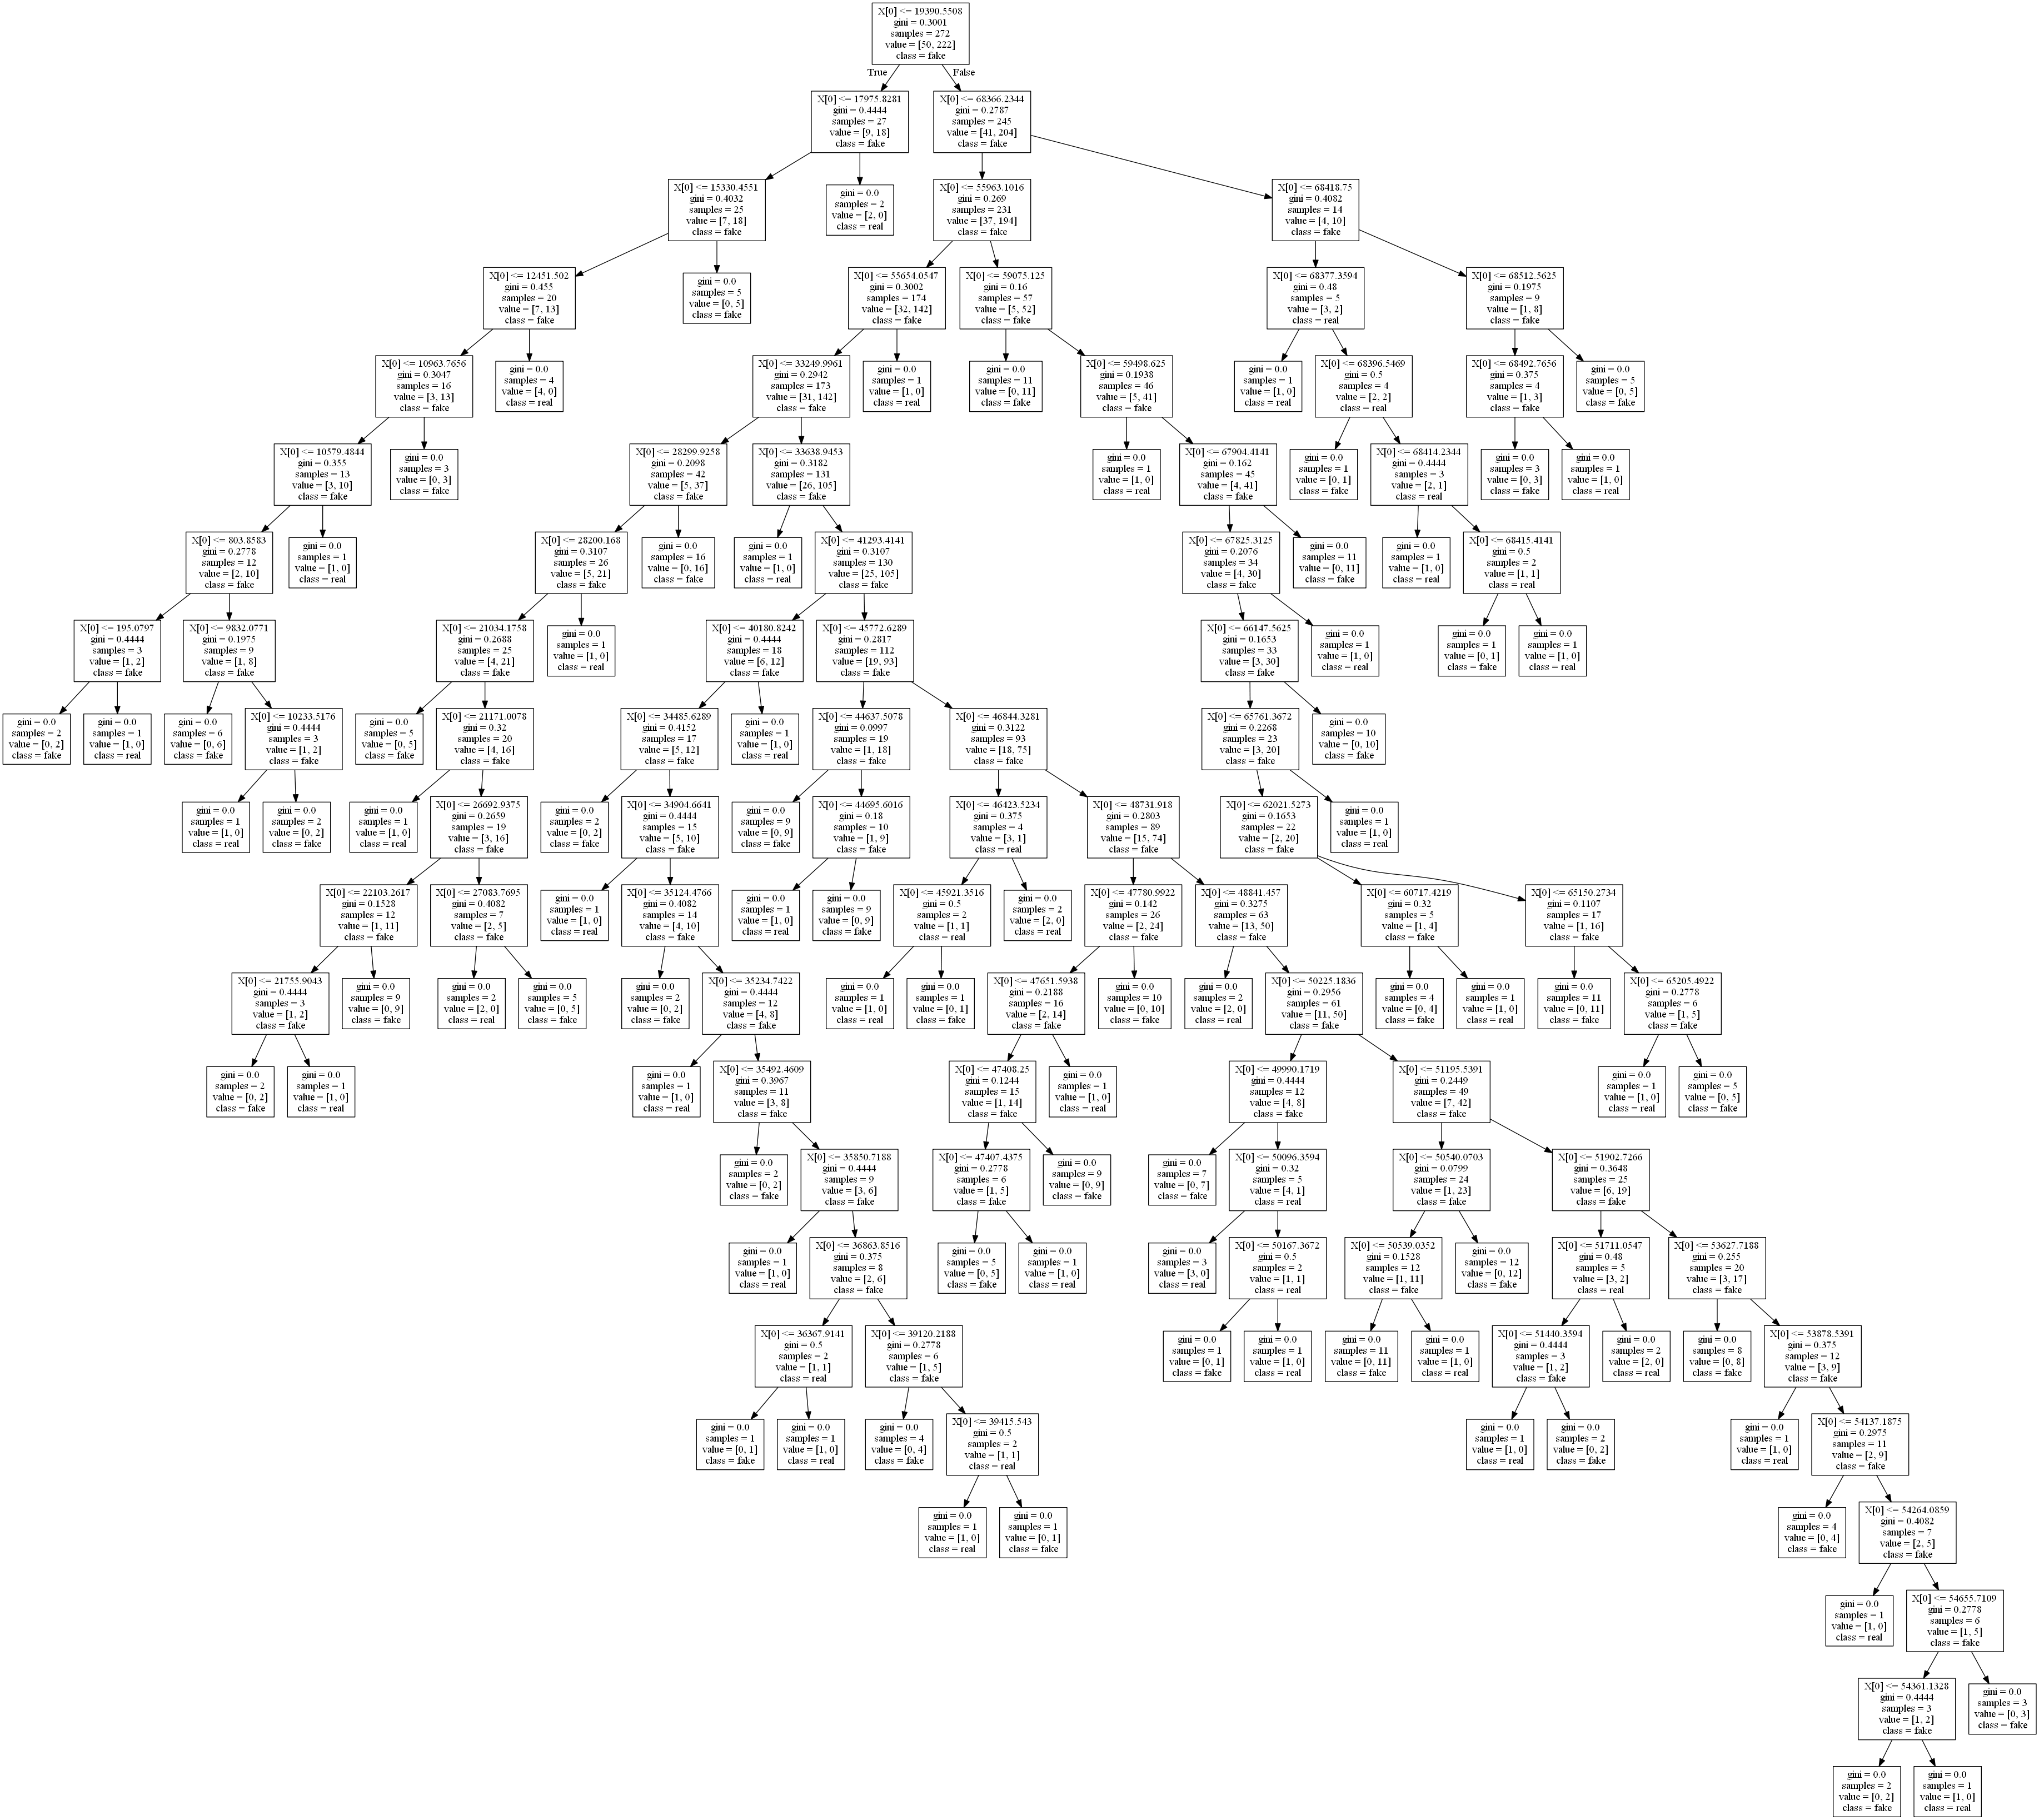

In [126]:
import pydotplus
dot_data = tree.export_graphviz(classifierUser, out_file=None,class_names=['real','fake']) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("followerTree.pdf") 
#tree.export_graphviz(classifierUser,out_file='tree.dot')
from IPython.display import Image  
Image(graph.create_png())  

In [273]:
freindsTest = pd.DataFrame(index=testSet,columns=["friends"])
for x in range(len(userData)):
    freinds.loc[x,"friends"]=userData[x][3]
for x in range(len(userDataTest)):
    freindsTest.loc[x,"friends"]=userDataTest[x][3]

classifierUser = tree.DecisionTreeClassifier()
classifierUser = classifierUser.fit(freinds, userTrainingLabels.values.ravel())
output=classifierUser.predict(freindsTest)
print(metrics.accuracy_score(userTestingLabels, output))

0.4


In [274]:
ffratioTest = pd.DataFrame(index=testSet,columns=["ffratio"])
for x in range(len(userData)):
    ffratio.loc[x,"ffratio"]=userData[x][2]/userData[x][3]
for x in range(len(userDataTest)):
    ffratioTest.loc[x,"ffratio"]=userDataTest[x][2]/userData[x][3]

classifierUser = tree.DecisionTreeClassifier()
classifierUser = classifierUser.fit(ffratio, userTrainingLabels.values.ravel())
output=classifierUser.predict(ffratioTest)
print(metrics.accuracy_score(userTestingLabels, output))

0.28


In [275]:
timeDiffTest = pd.DataFrame(index=testSet,columns=["timeDiff"])
for x in range(len(userData)):
    timeDiff.loc[x,"timeDiff"]=userData[x][0]
for x in range(len(userDataTest)):
    timeDiffTest.loc[x,"timeDiff"]=userDataTest[x][0]

classifierUser = tree.DecisionTreeClassifier()
classifierUser = classifierUser.fit(timeDiff, userTrainingLabels.values.ravel())
output=classifierUser.predict(timeDiffTest)
print(metrics.accuracy_score(userTestingLabels, output))

0.4


In [276]:
statusesTest = pd.DataFrame(index=testSet,columns=["statuses"])
for x in range(len(userData)):
    statuses.loc[x,"statuses"]=userData[x][4]
for x in range(len(userDataTest)):
    statusesTest.loc[x,"statuses"]=userDataTest[x][4]

classifierUser = tree.DecisionTreeClassifier()
classifierUser = classifierUser.fit(statuses, userTrainingLabels.values.ravel())
output=classifierUser.predict(statusesTest)
print(metrics.accuracy_score(userTestingLabels, output))

0.4


In [277]:
favTest = pd.DataFrame(index=testSet,columns=["fav"])
for x in range(len(userData)):
    fav.loc[x,"fav"]=userData[x][1]
for x in range(len(userDataTest)):
    favTest.loc[x,"fav"]=userDataTest[x][1]

classifierUser = tree.DecisionTreeClassifier()
classifierUser = classifierUser.fit(fav, userTrainingLabels.values.ravel())
output=classifierUser.predict(favTest)
print(metrics.accuracy_score(userTestingLabels, output))

0.28


In [278]:
statusTimeRatio = pd.DataFrame(index=trainSet,columns=["statusTime"])
statusTimeRatioTest = pd.DataFrame(index=testSet,columns=["statusTime"])
for x in range(len(userData)):
    statusTimeRatio.loc[x,"statusTime"]=userData[x][4]/userData[x][0]
for x in range(len(userDataTest)):
    statusTimeRatioTest.loc[x,"statusTime"]=userDataTest[x][4]/userData[x][0]

classifierUser = tree.DecisionTreeClassifier()
classifierUser = classifierUser.fit(statusTimeRatio, userTrainingLabels.values.ravel())
output=classifierUser.predict(statusTimeRatioTest)
print(metrics.accuracy_score(userTestingLabels, output))

0.36


In [279]:
trainingDataUser = pd.DataFrame(index=trainSet,columns=["timeDiff","friends","statuses","ffratio","statusTime"])

In [280]:
for x in range(len(userData)):
    trainingDataUser.loc[x,"timeDiff"]=userData[x][0]
    #trainingDataUser.loc[x,"favorite"]=userData[x][1]
    #trainingDataUser.loc[x,"followers"]=userData[x][2]
    trainingDataUser.loc[x,"friends"]=userData[x][3]
    trainingDataUser.loc[x,"statuses"]=userData[x][4]
    trainingDataUser.loc[x,"ffratio"]=userData[x][2]/userData[x][3]
    trainingDataUser.loc[x,"statusTime"]=userData[x][4]/userData[x][0]

In [281]:
testingDataUser = pd.DataFrame(index=testSet,columns=["timeDiff","friends","statuses","ffratio","statusTime"])

In [282]:
trainingDataUser

,timeDiff,friends,statuses,ffratio,statusTime
0,21156.4,15,10431,494.4,0.493043
1,10910.5,153,728,757.307,0.0667246
2,47412.6,127,28255,1051.66,0.595939
3,47422.6,127,28252,1051.61,0.59575
4,31827.8,290,14510,693.4,0.45589
5,50694.2,12141,15401,0.910304,0.303802
6,50865.2,626,2368,3.86901,0.0465545
7,47495.4,125,28215,1067.22,0.594058
8,34018.2,6075,12552,8.39243,0.368979
9,52792.6,734,95434,1646.62,1.80772


In [283]:
for x in range(len(userDataTest)):
    testingDataUser.loc[x,"timeDiff"]=userDataTest[x][0]
    #testingDataUser.loc[x,"favorite"]=userDataTest[x][1]
    #testingDataUser.loc[x,"followers"]=userDataTest[x][2]
    testingDataUser.loc[x,"friends"]=userDataTest[x][3]
    testingDataUser.loc[x,"statuses"]=userDataTest[x][4]
    testingDataUser.loc[x,"ffratio"]=userDataTest[x][2]/userDataTest[x][3]
    testingDataUser.loc[x,"statusTime"]=userDataTest[x][4]/userDataTest[x][0]

In [414]:
classifierUser = tree.DecisionTreeClassifier()
classifierUser = classifierUser.fit(trainingDataUser, userTrainingLabels.values.ravel())
output=classifierUser.predict(testingDataUser)
print(metrics.accuracy_score(userTestingLabels, output))

0.4


In [313]:
calPrecision(output,userTestingLabels)

0.5

In [314]:
p=calPrecision(output,userTestingLabels)
r=calRecall(output,userTestingLabels)
print(p)
print(r)
print(fmeasure(p,r))

0.5
0.08333333333333333
0.14285714285714285


In [ ]:
#Combining Content Based and User Based

In [415]:
allData = list()
for index, row in df.iterrows():
    text=re.sub(' http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', "", row["text"])
    allData.append(((row["tweet_time"]-row["created_at"]).total_seconds()/3600,row["favorite_count"],row["followers_count"],row["friends_count"],row["statuses_count"],row["label"],text))
allData

[(21156.368611111113,
  85,
  7416,
  15,
  10431,
  'false',
  'Unconfirmed reports claim that Michael Essien has contracted Ebola.'),
 (10910.514722222222,
  328,
  115868,
  153,
  728,
  'false',
  'AC Milan midfielder Michael Essien has been diagnosed with Ebola. Get well soon Michael. [Daily Times]'),
 (47412.58138888889,
  46,
  133561,
  127,
  28255,
  'unverified',
  'Mike Brown was staying with his grandmother for the summer, who lived in the community. #Ferguson'),
 (47422.55888888889,
  53,
  133554,
  127,
  28252,
  'true',
  'Witness: Police allegedly stopped Mike Brown after yelling at him to walk on sidewalk. #Ferguson'),
 (31827.823888888888,
  37,
  201086,
  290,
  14510,
  'unverified',
  "Line of police cars with high beams on greets anyone trying to enter #Ferguson. It's shut down. No media allowed."),
 (50694.208333333336,
  93,
  11052,
  12141,
  15401,
  'unverified',
  'Currently the #FoxNews website has zero, repeat, ZERO coverage of the #Ferguson protests

In [416]:
allDataTest = list()
for index, row in dfTest.iterrows():
    text=re.sub(' http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', "", row["text"])
    allDataTest.append(((row["tweet_time"]-row["created_at"]).total_seconds()/3600,row["favorite_count"],row["followers_count"],row["friends_count"],row["statuses_count"],row["label"],text))
allDataTest

[(69428.01861111113,
  684,
  14134290,
  3,
  23811,
  'true',
  'Germanwings Airbus A320 crashes in French Alps near Digne'),
 (53162.21055555555,
  5,
  502598,
  30,
  109571,
  'false',
  'BREAKING: 148 passengers were on board #GermanWings Airbus A320 which has crashed in the southern French Alps'),
 (50306.946388888886,
  10,
  44760,
  2245,
  32865,
  'unverified',
  'Accident aircraft looks to be Germanwings (Airline code 4U or GWI) flight 9525, Barcelona to Dusseldorf. #4U9525'),
 (48397.7375,
  17,
  7846,
  723,
  1447,
  'false',
  'Now hearing 148 passengers + crew on board the #A320 that has crashed in southern French Alps. #GermanWings flight. @BBCWorld'),
 (54650.91027777778,
  17,
  756575,
  361,
  54532,
  'false',
  'German Wings airline tweeting now about reports of plane crashing in French Alps with 148 on board: @germanwings'),
 (67143.05333333334,
  10,
  2742831,
  8137,
  58973,
  'true',
  'Germanwings passenger plane crashes in France:'),
 (51529.811388888

In [417]:
features = noStopUnigrams + ["timeDiff","friends","statuses","ffratio","statusTime"]
trainingDataAll = pd.DataFrame(index=trainSet,columns=features)
testingDataAll = pd.DataFrame(index=testSet,columns=features)

In [418]:
len(allData)

272

In [419]:
for x in range(len(allData)):
    trainingDataAll.loc[x,"timeDiff"]=allData[x][0]
    trainingDataAll.loc[x,"friends"]=allData[x][3]
    trainingDataAll.loc[x,"statuses"]=allData[x][4]
    trainingDataAll.loc[x,"ffratio"]=allData[x][2]/allData[x][3]
    trainingDataAll.loc[x,"statusTime"]=allData[x][4]/allData[x][0]
    for item in noStopUnigrams:
        if item in allData[x][6]:
            trainingDataAll.loc[x,item]=1
        else:
            trainingDataAll.loc[x,item]=0

In [420]:
for x in range(len(allDataTest)):
    testingDataAll.loc[x,"timeDiff"]=allDataTest[x][0]
    testingDataAll.loc[x,"friends"]=allDataTest[x][3]
    testingDataAll.loc[x,"statuses"]=allDataTest[x][4]
    testingDataAll.loc[x,"ffratio"]=allDataTest[x][2]/allDataTest[x][3]
    testingDataAll.loc[x,"statusTime"]=allDataTest[x][4]/allDataTest[x][0]
    for item in noStopUnigrams:
        if item in allDataTest[x][6]:
            testingDataAll.loc[x,item]=1
        else:
            testingDataAll.loc[x,item]=0

In [421]:
allTrainingLabels=pd.DataFrame(index=trainSet,columns=["Label"])
allTestingLabels=pd.DataFrame(index=testSet,columns=["Label"])

for x in range(len(allData)):
    allTrainingLabels.loc[x,"Label"]=allData[x][5]
    
for x in range(len(allDataTest)):
    allTestingLabels.loc[x,"Label"]=allDataTest[x][5]

In [633]:
classifierUser = tree.DecisionTreeClassifier()
classifierUser = classifierUser.fit(trainingDataAll, allTrainingLabels.values.ravel())
output=classifierUser.predict(testingDataAll)
print(metrics.accuracy_score(allTestingLabels, output))

0.56


In [634]:
p=calPrecision(output,userTestingLabels)
r=calRecall(output,userTestingLabels)
print(p)
print(r)
print(fmeasure(p,r))

0.6666666666666666
0.3333333333333333
0.4444444444444444


In [ ]:
#Addtional Content Based Features

In [635]:
otherContentData=list()
otherContentDataTest=list()

for index, row in df.iterrows():
    url=0
    hashtag=0
    mention=0
    if len(row['hashtags'])>0:
        hashtag=1
    if len(row['url'])>0:
        url=1
    if len(row['user_mentions'])>0:
        mention=1
    otherContentData.append((url,hashtag,mention,row["label"]))
    
for index, row in dfTest.iterrows():
    url=0
    hashtag=0
    mention=0
    if len(row['hashtags'])>0:
        hashtag=1
    if len(row['url'])>0:
        url=1
    if len(row['user_mentions'])>0:
        mention=1
    otherContentDataTest.append((url,hashtag,mention,row["label"]))

In [636]:
otherContentData

[(0, 0, 0, 'false'),
 (0, 0, 0, 'false'),
 (0, 1, 0, 'unverified'),
 (0, 1, 0, 'true'),
 (0, 1, 0, 'unverified'),
 (0, 1, 0, 'unverified'),
 (0, 1, 0, 'unverified'),
 (0, 1, 0, 'unverified'),
 (0, 1, 0, 'unverified'),
 (1, 1, 0, 'unverified'),
 (1, 1, 0, 'unverified'),
 (1, 1, 0, 'unverified'),
 (0, 1, 0, 'unverified'),
 (0, 1, 0, 'unverified'),
 (0, 1, 0, 'unverified'),
 (0, 1, 0, 'unverified'),
 (0, 1, 0, 'unverified'),
 (0, 1, 0, 'unverified'),
 (0, 1, 0, 'unverified'),
 (1, 1, 0, 'unverified'),
 (0, 1, 0, 'unverified'),
 (0, 1, 0, 'unverified'),
 (1, 1, 0, 'unverified'),
 (0, 1, 0, 'unverified'),
 (0, 1, 0, 'unverified'),
 (0, 1, 0, 'unverified'),
 (0, 1, 0, 'unverified'),
 (0, 1, 0, 'unverified'),
 (0, 1, 0, 'unverified'),
 (1, 1, 1, 'unverified'),
 (0, 1, 0, 'unverified'),
 (0, 1, 0, 'unverified'),
 (0, 1, 0, 'unverified'),
 (0, 1, 0, 'unverified'),
 (1, 1, 0, 'unverified'),
 (1, 1, 0, 'unverified'),
 (0, 1, 0, 'unverified'),
 (0, 1, 0, 'unverified'),
 (1, 1, 0, 'unverified'),
 (

In [637]:
hasURL = pd.DataFrame(index=trainSet,columns=["hasURL"])
hasMention = pd.DataFrame(index=trainSet,columns=["hasMention"])
hasHashtag = pd.DataFrame(index=trainSet,columns=["hasHashtag"])
otherContentLabels = pd.DataFrame(index=trainSet,columns=["Label"])
#hasMultimedia = pd.DataFrame(index=trainSet,columns=["hasMultimedia"])

hasURLTest = pd.DataFrame(index=testSet,columns=["hasURL"])
hasMentionTest = pd.DataFrame(index=testSet,columns=["hasMention"])
hasHashtagTest = pd.DataFrame(index=testSet,columns=["hasHashtag"])
otherContentLabelsTest = pd.DataFrame(index=testSet,columns=["Label"])
#hasMultimediaTest = pd.DataFrame(index=testSet,columns=["hasMultimedia"])

for x in range(len(otherContentData)):
    otherContentLabels.loc[x,"Label"]=otherContentData[x][3]
for x in range(len(userDataTest)):
    otherContentLabelsTest.loc[x,"Label"]=otherContentDataTest[x][3]

In [638]:
for x in range(len(otherContentData)):
    hasURL.loc[x,"hasURL"]=otherContentData[x][0]
for x in range(len(userDataTest)):
    hasURLTest.loc[x,"hasURL"]=otherContentDataTest[x][0]

classifierUser = tree.DecisionTreeClassifier()
classifierUser = classifierUser.fit(hasURL, otherContentLabels.values.ravel())
output=classifierUser.predict(hasURLTest)
print(metrics.accuracy_score(otherContentLabelsTest, output))

0.4


In [639]:
for x in range(len(otherContentData)):
    hasMention.loc[x,"hasMention"]=otherContentData[x][2]
for x in range(len(userDataTest)):
    hasMentionTest.loc[x,"hasMention"]=otherContentDataTest[x][2]

classifierUser = tree.DecisionTreeClassifier()
classifierUser = classifierUser.fit(hasMention, otherContentLabels.values.ravel())
output=classifierUser.predict(hasMentionTest)
print(metrics.accuracy_score(otherContentLabelsTest, output))

0.4


In [640]:
for x in range(len(otherContentData)):
    hasHashtag.loc[x,"hasHashtag"]=otherContentData[x][1]
for x in range(len(userDataTest)):
    hasHashtagTest.loc[x,"hasHashtag"]=otherContentDataTest[x][1]

classifierUser = tree.DecisionTreeClassifier()
classifierUser = classifierUser.fit(hasHashtag, otherContentLabels.values.ravel())
output=classifierUser.predict(hasHashtagTest)
print(metrics.accuracy_score(otherContentLabelsTest, output))

0.4


In [641]:
otherContentVector = pd.DataFrame(index=trainSet,columns=["hasHashtag","hasMention","hasURL"])

otherContentVectorTest = pd.DataFrame(index=testSet,columns=["hasHashtag","hasMention","hasURL"])

In [646]:
for x in range(len(otherContentData)):
    otherContentVector.loc[x,"hasHashtag"]=otherContentData[x][1]
    otherContentVector.loc[x,"hasMention"]=otherContentData[x][2]
    otherContentVector.loc[x,"hasURL"]=otherContentData[x][0]
for x in range(len(userDataTest)):
    otherContentVectorTest.loc[x,"hasHashtag"]=otherContentData[x][1]
    otherContentVectorTest.loc[x,"hasMention"]=otherContentData[x][2]
    otherContentVectorTest.loc[x,"hasURL"]=otherContentData[x][0]

classifierUser = tree.DecisionTreeClassifier()
classifierUser = classifierUser.fit(otherContentVector, otherContentLabels.values.ravel())
output=classifierUser.predict(otherContentVectorTest)
print(metrics.accuracy_score(otherContentLabelsTest, output))

0.24


In [647]:
p=calPrecision(output,userTestingLabels)
r=calRecall(output,userTestingLabels)
print(p)
print(r)
print(fmeasure(p,r))

ZeroDivisionError: division by zero

In [264]:
output

array(['true', 'true', 'true', 'true', 'true', 'true', 'true', 'true',
       'true', 'true', 'true', 'true', 'true', 'true', 'true', 'true',
       'true', 'true', 'true', 'true', 'true', 'true', 'true', 'true',
       'true'], dtype=object)